In [1]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import random
from glob import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
# Loading and converting them to number arrays
# images are inside data_images/men and data_images/women folder

men_files = glob('data_images/men/*')
women_files = glob('data_images/women/*')


In [19]:
# Original Image
test_first_image = cv2.imread(men_files[0])
plt.subplot(1,4,1)
plt.imshow(test_first_image)

resize_img = cv2.resize(src = test_first_image, dsize = (300, 300))
normalize_img = cv2.normalize(resize_img, alpha = 0.0, beta = 1.0, dst = resize_img, dtype=cv2.CV_32F, norm_type=cv2.NORM_MINMAX)
plt.subplot(1,4,2)
plt.imshow(normalize_img) 

resize_img = cv2.resize(src = test_first_image, dsize = (150, 150))
normalize_img = cv2.normalize(resize_img, alpha = 0.0, beta = 1.0, dst = resize_img, dtype=cv2.CV_32F, norm_type=cv2.NORM_MINMAX)
plt.subplot(1,4,3)
plt.imshow(normalize_img) 

resize_img = cv2.resize(src = test_first_image, dsize = (100, 100))
normalize_img = cv2.normalize(resize_img, alpha = 0.0, beta = 1.0, dst = resize_img, dtype=cv2.CV_32F, norm_type=cv2.NORM_MINMAX)
plt.subplot(1,4,4)
plt.imshow(normalize_img) 
plt.show()

NameError: name 'fig' is not defined

In [20]:


# Conveting male image files to numpy array by keeping data of each pixel.
men_arr = []
for filename in men_files:
    try:
        img = cv2.imread(filename)
        resize_img = cv2.resize(src = img, dsize = (150, 150))
        normalize_img = cv2.normalize(resize_img, alpha = 0.0, beta = 1.0, dst = resize_img, dtype=cv2.CV_32F, norm_type=cv2.NORM_MINMAX)
        men_arr.append(normalize_img)
    except:
        continue
        
        
women_arr = []
for filename in women_files:
    try:
        img = cv2.imread(filename)
        resize_img = cv2.resize(src = img, dsize = (150, 150))
        normalize_img = cv2.normalize(resize_img, alpha = 0.0, beta = 1.0, dst = resize_img, dtype=cv2.CV_32F, norm_type=cv2.NORM_MINMAX)
        women_arr.append(normalize_img)
    except:
        continue

In [21]:
len(women_arr), len(men_arr)

(1270, 1242)

Plot of resized image:


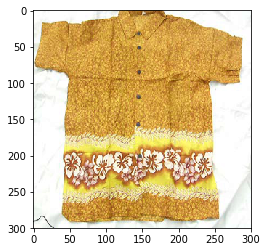

In [4]:
# Resized image!
print('Plot of resized image:')
plt.imshow(men_arr[0])

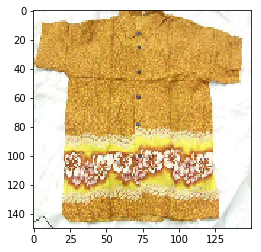

In [13]:
resize_img = cv2.resize(src = test_first_image, dsize = (150, 150))
normalize_img = cv2.normalize(resize_img, alpha = 0.0, beta = 1.0, dst = resize_img, dtype=cv2.CV_32F, norm_type=cv2.NORM_MINMAX)
plt.imshow(normalize_img)        

In [22]:
# Flattening the arrays to one single dimension array for each data points

target = []
training_set = []

for i in range(len(women_arr)):
    training_set.append(women_arr[i].flatten())
    target.append(1)

for i in range(len(men_arr)):
    training_set.append(men_arr[i].flatten())
    target.append(0)    

training_set = np.asarray(training_set)

In [23]:
# Splitting to training and test dataset

X_train, X_test, y_train, y_test = train_test_split(training_set, target, test_size=0.3, random_state=25)

In [11]:
# Building a Linear Support Vector Classifier
clf = LinearSVC(random_state=25, tol=1e-5)
clf.fit(X_train, y_train)

print('Data fit')

# Prediciting both outcomes for training set and test set for error calculation
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Data Creating Report')

# Producing mean accuracy score and classification report for finding performance of model in 
target_names = ['male', 'female']
print('Accuracy score on training data, {0:.2f}'.format(clf.score(X_train, y_train)))
print('Classification Report on training data')
print(classification_report(y_train, y_train_pred, target_names=target_names))
print('Accuracy score on test data, {0:.2f}'.format(clf.score(X_test, y_test)))
print('Classification Report on test data')
print(classification_report(y_test, y_test_pred, target_names=target_names))

KeyboardInterrupt: 

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

print('Data fit')

# Prediciting both outcomes for training set and test set for error calculation
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Data Creating Report')

# Producing mean accuracy score and classification report for finding performance of model in 
target_names = ['male', 'female']
print('Accuracy score on training data, {0:.2f}'.format(clf.score(X_train, y_train)))
print('Classification Report on training data')
print(classification_report(y_train, y_train_pred, target_names=target_names))
print('Accuracy score on test data, {0:.2f}'.format(clf.score(X_test, y_test)))
print('Classification Report on test data')
print(classification_report(y_test, y_test_pred, target_names=target_names))

Data fit
Data Creating Report
Accuracy score on training data, 1.00
Classification Report on training data
             precision    recall  f1-score   support

       male       1.00      1.00      1.00       876
     female       1.00      1.00      1.00       882

avg / total       1.00      1.00      1.00      1758

Accuracy score on test data, 0.65
Classification Report on test data
             precision    recall  f1-score   support

       male       0.65      0.60      0.63       366
     female       0.65      0.70      0.67       388

avg / total       0.65      0.65      0.65       754



## PCA transformation before running classifier

In [ ]:
# Finding the best number of principle components

pca = PCA()
pca.fit(X_train) #

cum_exp_var = np.cumsum(pca.explained_variance_ratio_)*100
print('This step done')
num_components = [n for n in range(len(cum_exp_var))]
plt.figure(figsize=(10, 10))
plt.plot(num_compenents, cum_exp_var, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

In [7]:
# fitting and transforming PCA transformation

pca = PCA(n_components = 10)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)

# # Splitting to training and test dataset



print('Data transformed')

# Building a Linear Support Vector Classifier
pca_clf = LinearSVC(random_state=25, tol=1e-5)
pca_clf.fit(pca_X_train, y_train)

print('Data fit')

# Prediciting both outcomes for training set and test set for error calculation
y_train_pred = pca_clf.predict(pca_X_train)
y_test_pred = pca_clf.predict(pca_X_test)

print('Data Creating Report')

# Producing mean accuracy score and classification report for finding performance of model in 
target_names = ['male', 'female']
print('Accuracy score on training data, {0:.2f}'.format(pca_clf.score(pca_X_train, y_train)))
print('Classification Report on training data')
print(classification_report(y_train, y_train_pred, target_names=target_names))
print('Accuracy score on test data, {0:.2f}'.format(pca_clf.score(pca_X_test, y_test)))
print('Classification Report on test data')
print(classification_report(y_test, y_test_pred, target_names=target_names))

Data transformed
Data fit
Data Creating Report
Accuracy score on training data, 0.55
Classification Report on training data
             precision    recall  f1-score   support

       male       0.55      0.51      0.53       876
     female       0.55      0.58      0.56       882

avg / total       0.55      0.55      0.55      1758

Accuracy score on test data, 0.55
Classification Report on test data
             precision    recall  f1-score   support

       male       0.53      0.52      0.53       366
     female       0.56      0.56      0.56       388

avg / total       0.54      0.55      0.54       754



In [8]:

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

lda_X_train = lda.transform(X_train)
lda_X_test = lda.transform(X_test)

print('Data transformed')

lda_clf = LinearSVC(random_state=25, tol=1e-5)
lda_clf.fit(lda_X_train, y_train)

print('Data fit')

y_train_pred = lda_clf.predict(lda_X_train)
y_test_pred = lda_clf.predict(lda_X_test)

print('Data Creating Report')

# Producing mean accuracy score and classification report for finding performance of model in 
target_names = ['male', 'female']
print('Accuracy score on training data, {0:.2f}'.format(lda_clf.score(lda_X_train, y_train)))
print('Classification Report on training data')
print(classification_report(y_train, y_train_pred, target_names=target_names))
print('Accuracy score on test data, {0:.2f}'.format(lda_clf.score(lda_X_test, y_test)))
print('Classification Report on test data')
print(classification_report(y_test, y_test_pred, target_names=target_names))

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Data transformed
Data fit
Data Creating Report


ValueError: X has 1 features per sample; expecting 10

In [9]:
# Producing mean accuracy score and classification report for finding performance of model in 
target_names = ['male', 'female']
print('Accuracy score on training data, {0:.2f}'.format(lda_clf.score(lda_X_train, y_train)))
print('Classification Report on training data')
print(classification_report(y_train, y_train_pred, target_names=target_names))
print('Accuracy score on test data, {0:.2f}'.format(lda_clf.score(lda_X_test, y_test)))
print('Classification Report on test data')
print(classification_report(y_test, y_test_pred, target_names=target_names))

Accuracy score on training data, 1.00
Classification Report on training data
             precision    recall  f1-score   support

       male       1.00      1.00      1.00       876
     female       1.00      1.00      1.00       882

avg / total       1.00      1.00      1.00      1758

Accuracy score on test data, 0.48
Classification Report on test data
             precision    recall  f1-score   support

       male       0.47      0.47      0.47       366
     female       0.50      0.49      0.49       388

avg / total       0.48      0.48      0.48       754

